# Object Oriented Programing:
1. Syntax
2. Build a Python Package

## Syntax
1. procedural vs object-oriented programming
2. classes, objects, methods and attributes
3. coding a class
4. magic methods
5. inheritance

## Build a Python Package
1. making a package
2. tour of scikit-learn source code
3. putting your package on PyPi

### Overview: Why Object-Oriented Programming?
Object-oriented programming has a few benefits over procedural programming, which is the programming style you most likely first learned. As you'll see in this lesson,
* OOP allows you to create large, modular programs that can easily expand over time
* OOPs hide the implementation from the end-user

Consider Python packages like [Scikit-learn](https://github.com/scikit-learn/scikit-learn), [pandas](https://pandas.pydata.org/), and [NumPy](http://www.numpy.org/). These are all Python packages built with object-oriented programming. Scikit-learn, for example, is a relatively large and complex package built with object-oriented programming. This package has expanded over the years with new functionality and new algorithms.

When you train a machine learning algorithm with Scikit-learn, you don't have to know anything about how the algorithms work or how they were coded. You can focus directly on the modeling.

Here's an example taken from the [Scikit-learn website](http://scikit-learn.org/stable/modules/svm.html):
```python
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
```

How does Scikit-learn train the SVM model? You don't need to know because the implementation is hidden with object-oriented programming. If the implementation changes, you as a user of Scikit-learn might not ever find out. Whether or not you SHOULD understand how SVM works is a different question.

In this lesson, you'll practice the fundamentals of object-oriented programming. By the end of the lesson, you'll have built a Python package using object-oriented programming.

This lesson uses classroom workspaces that contain all of the files and functionality you will need. You can also find the files in the [data scientist nanodegree term 2 GitHub repo](https://github.com/udacity/DSND_Term2/tree/master/lessons/ObjectOrientedProgramming) or [my repo here](https://github.com/ChristopherDaigle/udacity_nano_ds/tree/master/udacity_dsnd_two/lessons/ObjectOrientedProgramming).

## Syntax: Procedural vs Object-Oriented Programming
* Procedural programming is a form of programming that executes stages of a program in a linear fashion
* Object-Oriented Programming executes based on the attributes of objects

**Objects are defined by characteristics and actions:**
Example:<br>
* Sales Person as Object:

**Characteristics (Attributes)**
> * Name
> * Address
> * Phone Number
> * Hourly Pay<br>

**Actions (Method)**
> * Sell item
> * Take item

* Shirt as Object:

**Attributes**
> * Color
> * Size
> * Style
> * Price

**Method**
> * Change Price

**Characteristics and Actions in English Grammar**
Another way to think about characteristics and actions is in terms of English grammar
> * **characteristic** would be a noun
> * **action** would be a verb.

Let's pick something from the real-world: a dog. A few characteristics could be the dog's weight, color, breed, and height. These are all nouns. What actions would a dog take? A dog can bark, run, bite and eat. These are all verbs.

## Syntax: Vocabulary
* class - a blueprint consisting of methods and attributes
* object - an instance of a class. It can help to think of objects as something in the real world like a yellow * * pencil, a small dog, a blue shirt, etc. However, as you'll see later in the lesson, objects can be more abstract.
* attribute - a descriptor or characteristic. Examples would be color, length, size, etc. These attributes can take on specific values like blue, 3 inches, large, etc.
* method - an action that a class or object could take
* OOP - a commonly used abbreviation for object-oriented programming
* encapsulation - one of the fundamental ideas behind object-oriented programming is called encapsulation: you can combine functions and data all into a single entity. In object-oriented programming, this single entity is called a class. Encapsulation allows you to hide implementation details much like how the scikit-learn package hides the implementation of machine learning algorithms.

In English, you might hear an attribute described as a property, description, feature, quality, trait, or characteristic. All of these are saying the same thing.

Defining a shirt:
```python
class Shirt:

    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        self.color = shirt_color
        self.size = shirt_size
        self.style = shirt_style
        self.price = shirt_price
    
    def change_price(self, new_price):
    
        self.price = new_price
        
    def discount(self, discount):

        return self.price * (1 - discount)```

### Set and Get methods

The shirt class has a method to change the price of the shirt: shirt_one.change_price(20). In Python, you can also change the values of an attribute with the following syntax:
```python
shirt_one.price = 10
shirt_one.price = 20
shirt_one.color = 'red'
shirt_one.size = 'M'
shirt_one.style = 'long_sleeve'
```

This code accesses and changes the price, color, size and style attributes directly. *Accessing attributes directly would be frowned upon in many other languages* **but not in Python.** Instead, the *general object-oriented programming convention is to use methods to access attributes or change attribute values.* These methods are called set and get methods or setter and getter methods.

A **get method** is for obtaining an attribute value. A **set method** is for changing an attribute value. If you were writing a Shirt class, the code could look like this:
```python
class Shirt:

    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        self._price = shirt_price

    def get_price(self):
      return self._price

    def set_price(self, new_price):
      self._price = new_price
```
Instantiating and using an object might look like:
```python
shirt_one = Shirt('yellow', 'M', 'long-sleeve', 15)
print(shirt_one.get_price())
shirt_one.set_price(10)
```

### Set and Get Methods: Explained
In the class definition,
```python
def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
    self._price = shirt_price
```

the underscore in front of price (i.e. `self._price = shirt_price`) is a somewhat controversial Python convention. In other languages like C++ or Java, price could be explicitly labeled as a private variable. This would *prohibit an object from accessing the price attribute directly* like `shirt_one._price = 15`.

However, Python does not distinguish between private and public variables like other languages. Therefore, there is some controversy about using the underscore convention as well as get and set methods in Python. Why use get and set methods in Python when Python wasn't designed to use them?

At the same time, you'll find that some Python programmers develop object-oriented programs using get and set methods anyway. Following the Python convention, the underscore in front of price is to let a programmer know that price should only be accessed with get and set methods rather than accessing price directly with `shirt_one._price`. However, a programmer could still access `_price` directly because there is nothing in the Python language to prevent the direct access.

**To reiterate**, a programmer could technically still do something like `shirt_one._price = 10`, and the code would work. But *accessing price directly, in this case, would not be following the intent of how the Shirt class was designed.*

One of the benefits of set and get methods is that, as previously mentioned in the course, you can hide the implementation from your user. Maybe originally a variable was coded as a list and later became a dictionary. With set and get methods, you could easily change how that variable gets accessed. Without set and get methods, you'd have to go to every place in the code that accessed the variable directly and change the code.

You can read more about get and set methods in Python on this [Python Tutorial site](https://www.python-course.eu/python3_properties.php).

### Note about Attributes
There are some drawbacks to accessing attributes directly versus writing a method for accessing attributes.

In terms of object-oriented programming, the rules in Python are a bit looser than in other programming languages. As previously mentioned, in some languages, like C++, you can explicitly state whether or not an object should be allowed to change or access an attribute's values directly. Python does not have this option.

Why might it be better to change a value with a method instead of directly? Changing values via a method gives you more flexibility in the long-term. What if the units of measurement change, like the store was originally meant to work in US dollars and now has to handle Euros?

---
**Example: Dollars versus Euros**
If you've changed attribute values directly, you'll have to go through your code and find all the places where US dollars were used, like:
```python
shirt_one.price = 10 # US dollars
```
and then manuall change to Euros
```python
shirt_one.price = 8 # Euros
```
---
If you had used a method, then you would only have to change the method to convert from dollars to Euros

---
```python
def change_price(self, new_price):
#     self.price = new_price # USD
    self.price = new_price * 0.81 # Euros

shirt_one.change_price(10)
print(shirt_one.price)
```
**OUTPUT**<br>
`8.1`

---

### Modularized Code
If you were developing a software program, you would want to modularize this code.

You would put the Shirt class into its own Python script called, say, `shirt.py`. And then in another Python script, you would import the Shirt class with a line like: `from shirt import Shirt`

## Commenting Object-Oriented Code
A docstring is a type of comment that describes how a Python module, function, class or method works. Docstrings, therefore, are not unique to object-oriented programming. This section of the course is merely reminding you to use docstrings and to comment your code. It's not just going to help you understand and maintain your code. It will also make you a better job candidate.

Use both in-line comments and document level comments as appropriate.

Check out [this link](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html) to read more about docstrings.

---
### Docstrings and Object-Oriented Code
Below is an example of a class with docstrings and a few things to keep in mind:
* Make sure to indent your docstrings correctly or the code will not run. A docstring should be indented one indentation underneath the class or method being described.
* You don't have to define 'self' in your method docstrings. It's understood that any method will have self as the first method input.

```python
class Pants:
    """The Pants class represents an article of clothing sold in a store
    """

    def __init__(self, color, waist_size, length, price):
        """Method for initializing a Pants object

        Args: 
            color (str)
            waist_size (int)
            length (int)
            price (float)

        Attributes:
            color (str): color of a pants object
            waist_size (str): waist size of a pants object
            length (str): length of a pants object
            price (float): price of a pants object
        """

        self.color = color
        self.waist_size = waist_size
        self.length = length
        self.price = price

    def change_price(self, new_price):
        """The change_price method changes the price attribute of a pants object

        Args: 
            new_price (float): the new price of the pants object

        Returns: None

        """
        self.price = new_price

    def discount(self, percentage):
        """The discount method outputs a discounted price of a pants object

        Args:
            percentage (float): a decimal representing the amount to discount

        Returns:
            float: the discounted price
        """
        return self.price * (1 - percentage)
    ```

# Creating a Python package - Analyze a Gaussian Distribution
- Read dataset
- Calculate mean
- Calculate standard deviation
- Plot histogram
- Plot probability density function (PDF)

<br><br>
* **Gaussian Distribution PDF**:
$$f\left(x\ \middle| \ \mu , \ \sigma^{2} \right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-\left(x-\mu\right)^{2}}{2\sigma^{2}}}$$<br>

* **Binomial Distribution**:
The binomial distribution is used when there are exactly two mutually exclusive outcomes of a trial. These outcomes are appropriately labeled "success" and "failure". The binomial distribution is used to obtain the probability of observing $k$ successes in $n$ trials, with the probability of success on a single trial denoted by $p$. The binomial distribution assumes that $p$ is fixed for all trials

$$f\left(k,\ n,\ p\right) = \frac{n!}{k!\left(n-k\right)!}p^{k}\left(1-p\right)^{\left(n-k\right)}$$

Where $p$ is the probability of an outcome, $n$ is the number of observations, $k$ is the outcome of interest

> * mean: $\mu = n\cdot p$<br>
> * variance: $\sigma^{2}=n\cdot p \cdot \left(1-p\right)$
> * standard deviation: $\sqrt{n\cdot p \cdot \left(1-p\right)}$<br>

> Example:<br>
Let $k=2$, $n=2$, amd $p=0.5$
$$f\left(k=2,\ n=2,\ p=2\right)=\frac{2!}{2!\left(2-2\right)!}\left(0.5\right)^{2}\left(1-0.5\right)^{\left(2-2\right)}=\frac{2}{2}\left(0.25\right)\left(1\right)=0.25$$

## ASIDE: Further Resources
If you would like to review the Gaussian (normal) distribution and binomial distribution, here are a few resources:

This free Udacity course, [Intro to Statistics](https://www.udacity.com/course/intro-to-statistics--st101), has a lesson on Gaussian distributions as well as the Binomial distribution.

This free course, [Intro to Descriptive Statistics](https://www.udacity.com/course/intro-to-descriptive-statistics--ud827), also has a Gaussian distributions lesson.

**Here are the wikipedia articles:**
* [Gaussian Distributions Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)
* [Binomial Distributions Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

## Gaussian PDF Code:
```python
import math
import matplotlib.pyplot as plt

class Gaussian():
    """
    Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def calculate_mean(self):
        """
        Method to calculate the mean of the data set.
        Args: 
            None
        
        Returns: 
            float: mean of the data set    
        """
        self.mean = sum(self.data) / len(self.data)
        
        return self.mean


    def calculate_stdev(self, sample=True):
        """
        Method to calculate the standard deviation of the data set.
        Args: 
            sample (bool): whether the data represents a sample or population
        Returns: 
            float: standard deviation of the data set    
        """
        mu = self.mean
        diff = [(x - mu) ** 2 for x in self.data]
        quantity = sum(diff)
        
        n = len(self.data)
        if sample == True:
            n -= 1
        else:
            pass
        
        variance = quantity / n
        
        self.stdev = math.sqrt(variance)
        
        return self.stdev


    def read_data_file(self, file_name, sample=True):
        """
        Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
        Args:
            file_name (string): name of a file to read from
        Returns:
            None
        """
        
        # This code opens a data file and appends the data to a list called data_list
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)


    def plot_histogram(self):
        """
        Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        Args:
            None
        Returns:
            None
        """
        x_label = 'Data'
        y_label = 'Frequency'
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel(x_label)
        plt.ylabel(y_label)


    def pdf(self, x):
        """
        Probability density function calculator for the gaussian distribution.
        Args:
            x (float): point for calculating the probability density function
        Returns:
            float: probability density function output
        """
        (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        
        denom_quantity = 2 * math.pi * self.stdev ** 2
        denom = math.sqrt(denom_quantity)
        
        frac = 1 / denom
        
        exp_frac_num = (-1) * (x - self.mean) ** 2
        exp_frac_denom = 2 * self.stdev ** 2
        exp_frac = exp_frac_num / exp_frac_denom
        
        prob_dens_fct = frac * math.exp(exp_frac)
        
        return prob_dens_fct
```

## Magic Methods
Magic methods let you customize and override default python behavior

It's not possible to add to `Gaussian()`s together, but if we adapt the method of doing so by changing python's default behavior for this class, we can!
```python
    def __add__(self, other):
        """
        Magic method to add together two Gaussian distributions
            When summing two Gaussian distributions, the mean value is the sum
                of the means of each Gaussian.
            When summing two Gaussian distributions, the standard deviation is the
                square root of the sum of square ie sqrt(stdev_one ^ 2 + stdev_two ^ 2)
        Args:
            other (Gaussian): Gaussian instance
        Returns:
            Gaussian: Gaussian distribution 
        """
        result = Gaussian()

        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result


    def __repr__(self):
        """
        Magic method to output the characteristics of the Gaussian instance
        Args:
            None
        Returns:
            string: characteristics of the Gaussian
        """
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)
```

# Inheritance
The ability to generalize an object, then share some elements with different classes easily

For example, a clothing class with color, size, price, etc. generalizes for shirts, socks, pants, etc.

Each of those classes could inherit information from the clothing class instead. We can more easily adjust each of the "child" classes if we desire. Like adding material to the clothing class will affect all of those who inherited attributes from the clothing class (socks, pants, etc)

Example of inheritance:
```python
class Clothing:
    
    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price


    def change_price(self, price):
        self.price = price


    def calculate_discount(self, discount):
        return self.price * (1 - discount)
```
---
And here. we see the Shirt and Pants class (children classes) inherit the attibutes of the Clothing class (parent class):

```python
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        Clothing.__init__(self, color, size, style, price)
        self.long_or_short = long_or_short


    def double_price(self):
        self.price = 2 * self.price

        
class Pants(Clothing):
    
    def __init__(self, color, size, style, price, waist):
        
        Clothing.__init__(self, color, size, style, price)
        self.waist = waist
        
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount / 2)
```

### Another example of inheritance:
Parent class
```python
class Clothing:

    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price
        
    def change_price(self, price):
        self.price = price
        
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount)
    
    
    def calculate_shipping(self, weight, rate):
        return weight * rate
```
---
Child classes:
```python
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        Clothing.__init__(self, color, size, style, price)
        self.long_or_short = long_or_short
    
    def double_price(self):
        self.price = 2*self.price
    
class Pants(Clothing):

    def __init__(self, color, size, style, price, waist):
        
        Clothing.__init__(self, color, size, style, price)
        self.waist = waist
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount / 2)


class Blouse(Clothing):
    
    def __init__(self, color, size, style, price, country_of_origin):
        
        Clothing.__init__(self, color, size, style, price)
        self.country_of_origin = country_of_origin
        
        
    def triple_price(self):
        return 3 * self.price
```

Example with Gaussian for Distribution (parent)
```python
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
    
        Attributes:
            mean (float) representing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.
 
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list
```
---
Child Class
```python
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
    
        
    
    def calculate_mean(self):
    
        """Function to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """Function to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
        
        
    def plot_histogram(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y
        
    def __add__(self, other):
        
        """Function to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result
        
        
    def __repr__(self):
    
        """Function to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)
```

## Recap:
This note covers:
1. Classes and Object
2. Attributes and Methods
3. Magic methods
4. Inheritance

Classes, objects, attributes, methods, and inheritance are common to all object-oriented programming languages.

Knowing these topics is enough to start writing object-oriented software. These are only fundamentals of object-oriented programming.

Here is a list of resources for advanced Python object-oriented programing topics:
1. [Class methods, instance methods, and static methods](https://realpython.com/instance-class-and-static-methods-demystified/)
> - these are different types of methods that can be accessed at the class or object level

2. [Class attributes VS instance attributes](https://www.python-course.eu/python3_class_and_instance_attributes.php)
> - you can also define attributes at the class level or at the instance level

3. [Multiple inheritance, mixins](https://easyaspython.com/mixins-for-fun-and-profit-cb9962760556)
> - a class can inherit from multiple parent classes

4. [Python decorators](https://realpython.com/primer-on-python-decorators/)
>- decorators are a short-hand way for using functions inside other functions

## Organizing into Modules
* Modules are individual python files that contains a collection of functions, classes, or global variables
* Packages are a collection of modules placed into a directory

### Notes specific to Udacity Course:
>**Windows VS macOS VS Linux**<br>
Linux, which our Udacity classroom workspaces use, is an operating system like Windows or macOS. One important difference is that Linux is free and open source whereas Windows is owned by Microsoft and macOS by Apple.<br><br>
Throughout the lesson, you can do all of your work in a classroom workspace. These workspaces provide interfaces that connect to [virtual machines in the cloud](https://aws.amazon.com/getting-started/tutorials/launch-a-virtual-machine/). However, if you want to run this code locally on your computer, the commands to use might be slightly different.<br><br>
If you are using macOS, you can open an application called "Terminal" and essentially use the same commands that you use in the workspace. That is because [Linux and MacOS are related.](https://www.quora.com/Is-macOS-essentially-built-on-top-of-Linux)<br><br>
If you are using Windows, the analogous application is called console. The console commands can be somewhat different than the terminal commands. A search engine like Google is your best friend for finding the right commands in a Windows environment.<br><br>
The classroom workspace has one major benefit. You can do whatever you want to the workspace including installing Python packages. And if something goes wrong, you can reset the workspace and start with a clean slate; however, always download your code files or commit your code to github or gitlab before resetting a workspace. Otherwise, you will lose your code!

## Making a Package
In the previous section, the Distribution and Gaussian code was refactored into individual modules. A Python module is just a Python file containing code.

In this next section, you'll convert the Distributions code into a Python package.

A package is a collection of Python modules. Although the *previous code might already seem like it was a Python package because it contained multiple files*, a Python package also needs an `__init__.py` file. In this section, you'll learn how to create this `__init__.py` file and then pip install the package into your local Python installation.

### What is pip?
Pip is a [Python package manager](https://pip.pypa.io/en/stable/) that helps with installing and uninstalling Python packages. You might have used pip to install packages using the command line: `pip install numpy`. When you execute a command like `pip install numpy`, pip will download the package from a Python package repository called [PyPi](https://pypi.org/). However, for this next exercise, you'll use pip to install a Python package from a local folder on your computer. The last part of the lesson will focus on uploading packages to PyPi so that you can share your package with the world.

You can complete this entire lesson within the classroom using the provided workspaces; however, if you want to develop a package locally on your computer, you should consider setting up a virtual environment. That way if you install your package on your computer, the package won't install into your main Python installation. Before starting the next exercise, the next part of the lesson will discuss what virtual environments are and how to use them.

### Importing a package
A python package must have the `__init__.py` file, but it can be empty. However, if you have something like:
`__init__.py` in the `distributions` folder:
```python
from .Gaussiandistributions import Gaussian
```

you can later just use
```python
from distributions import Gaussian
```
to import the module directly

Otherwise, if `__init__.py` is blank, it would require:
```python
from distributions.Gaussiandistributions import Gaussian
```

When creating a package that `pip` will be able to install, the home directory of the package should contain a file titled `setup.py` and may look something like:
```python
from setuptools import setup

setup(name='distributions',
      version='0.1',
      description='Gaussian distributions',
      packages=['distributions'],
      zip_safe=False)
```
### Installing the package
1. Go to the home directory inside the package where the `setup.py` module exists (e.g. `cd python_package_example`)
2. In the terminal, enter: `pip install .`
> - This tells `pip` to search for the `setup.py` and install the elements in `packages` (i.e. `'distributions'`)

### Using the package
Now that the packge has been installed with `pip install .`, it is available in the environment
1. Open python (IDE or terminal)
2. Now the package can be used as such:
```python
>>> from distributions import Gaussian
>>> gaussian_one = Gaussian(10,5)
>>> gaussian_one.mean
10
>>> gaussian_one.stdev
5
```

### Checking installation of the package:
`pip` installs package to a specific location. That location can be checked while in python
1. Open python
2. For the package you're interested in, if it's installed, check its location as such
```python
>>> import distributions
>>> distributions.__file__
'/opt/conda/lib/python3.6/site-packages/distributions/__init__.py'
```

## Object-Oriented Programming and Python Packages
A Python package does not need to use object-oriented programming. You could simply have a Python module with a set of functions. However, most if not all of the popular Python packages take advantage of object-oriented programming for a few reasons:
* Object-oriented programs are relatively easy to expand especially because of inheritance
* Object-oriented programs obscure functionality from the user.
> Consider `scipy` packages. You don't need to know how the actual code works in order to use its classes and methods.

# Virtual Environments

## Python Environments
If you decide to install your package on your local computer, you'll want to create a virtual environment. A virtual environment is a silo-ed Python installation apart from your main Python installation. That way you can install packages and delete the virtual environment without affecting your main Python installation

Let's talk about two different Python environment managers: conda and venv. You can create virtual environments with either one. Below you'll read about each of these environment managers including some advantages and disadvantages. If you've taken other data science, machine learning or artificial intelligence courses at Udacity, you're probably already familiar with [conda](https://conda.io/docs/).

### Conda
Conda does two things: manages packages and manages environments.

As a package manager, conda makes it easy to install Python packages especially for data science. For instance, typing `conda install numpy` will install the numpy package.

As an environment manager, conda allows you to create silo-ed Python installations. With an environment manager, you can install packages on your computer without affecting your main Python installation.

The command line code looks something like this:
```shell
conda create --name environment_name
source activate environment_name
conda install numpy
```

### Pip and Venv
There are other environmental managers and package managers besides conda. For example, venv is an environment manager that comes pre-installed with Python 3. Pip is a package manager.

Pip can only manage Python packages whereas conda is a language agnostic package manager. In fact, conda was invented because pip could not handle data science packages that depended on libraries outside of Python. If you look at the [history of conda](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/#Myth-#5:-conda-doesn't-work-with-virtualenv,-so-it's-useless-for-my-workflow), you'll find that the software engineers behind conda needed a way to manage data science packages (NumPy, Matplotlib, etc.) that relied on libraries outside of Python.

Conda manages environments AND packages. Pip only manages packages.

To use venv and pip, the commands look something like this:
```shell
python3 -m venv environment_name
source environment_name/bin/activate
pip install numpy
```

**Choosing**
Whether you choose to create environments with venv or conda will depend on your use case. Conda is very helpful for data science projects, but **conda can make generic Python software development a bit more confusing**; that's the case for this project.

If you create a conda environment, activate the environment, and then pip install the distributions package, you'll find that the system installs your package [globally rather than in your local conda environment](https://github.com/ContinuumIO/anaconda-issues/issues/1429). However, if you create the conda environment and install pip simultaneously, you'll find that pip behaves as expected installing packages into your local environment:
```shell
conda create --name environment_name pip
```

On the other hand, using pip with venv works as expected. Pip and venv tend to be used for generic software development projects including web development. For this lesson on creating packages, you can use conda or venv if you want to develop locally on your computer and install your package.

### Instructions for venv
Here are instructions about how to set up virtual environments on a macOS, Linux, or Windows machine using the terminal: [instructions link](https://packaging.python.org/guides/installing-using-pip-and-virtualenv/).

These are a few notes for understanding the tutorial:
* If you are using Python 2.7.9 or later (including Python 3), the Python installation should already come with the Python package manager called pip. There is no need to install it
* `env` is the name of the environment you want to create. You can call `env` anything you want
* Python 3 comes with a virtual environment package pre-installed. So instead of typing `python3 -m virtualenv env`, you can type `python3 -m venv env` to create a virtual environment

Once you've activated a virtual environment, you can then use terminal commands to go into the directory where your Python library is stored. And then you can run `pip install .`. In the next section, you can practice pip installing and/or creating virtual environments in the classroom workspace. You'll see that creating a virtual environment actually creates a new folder containing a Python installation. Deleting this folder will remove the virtual environment.

## Contributing to a GitHub project
Here are a few links about how to contribute to a github project:
* [Beginner's Guide to Contributing to a Github Project](https://akrabat.com/the-beginners-guide-to-contributing-to-a-github-project/)
* [Contributing to a Github Project](https://github.com/MarcDiethelm/contributing/blob/master/README.md)

### Advanced Python OOP Topics
Here are a few links to more advanced OOP topics that appear in the Scikit-learn package:
* [Decorators](https://realpython.com/primer-on-python-decorators/)
* [Mixins](https://easyaspython.com/mixins-for-fun-and-profit-cb9962760556)

## Putting Code on PyPi (Python Package Index)
**PyPi vs. Test PyPi**
Note that [pypi.org](https://pypi.org/) and [test.pypy.org](https://test.pypi.org/) are two different websites. You'll need to register separately at each website. If you only register at [pypi.org](https://pypi.org/), you will not be able to upload to the [test.pypy.org](https://test.pypi.org/) repository.

Also, remember that your package name must be unique. If you use a package name that is already taken, you will get an error when trying to upload the package.

When you `pip install` a package, you are downloading and installing files from PyPi.

When you want to upload a package to PyPi, you will need:

**SETUP THE PACKAGE FOR UPLOAD**
1. All relevant code (__init.py__, setup.py, etc.)
2. README.md related to how the package works
3. license.txt filled with license information (e.g. [MIT](https://opensource.org/licenses/MIT))
4. setup.cfg filled with:
```shell
[metadata]
description-file = README.md
```

5. Adjust setup.py

```python
from setuptools import setup

setup(name='daigle_dist',
      version='0.1',
      description='Gaussian and Binomial Distributions',
      packages=['daigle_dist'],
      author='Christopher Daigle',
      author_email='pcjdaigle@gmail.com',
      zip_safe=False)
```
> * NOTE: `zip_safe` takes a boolean indicating whether the package can be run as a zip-file, this is worth addressing when the package relies on data that needs to be included/ran with the package in an unzipped format

6. Change the name of the package folder to match the `name` variable in `setup.py`

Now that all items are set, go to the folder that contains all of the package files (i.e. the one holding `setup.py`)

**UPLOAD THE PACKAGE TO TEST.PYPI**
1. While in the folder holding the package files (i.e. `setup.py`), run `python setup.py sdist` from the terminal
> * This should create a directory `dist` with a a `filename-version.tar.gz`<br>
2. Ensure the `twine` package is installed (i.e. `pip install twine`)
3. To upload the package to the PyPi test repository, enter `twine upload --repository-url https://test.pypi.org/legacy/ dist/*`
4. Enter your test.pypi.org credentials
5. You may need to adjust the version or other items if the upload fails
6. You can now install the package with `pip install --index-url https://test.pypi.org/simple/ daigle-dist`

mean 25, standard deviation 2
0.4
20

[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
0.6153846153846154
13


None

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [4.030384466833637e-06,
  8.383199691013966e-05,
  0.000804787170337341,
  0.0047214180659790675,
  0.01888567226391627,
  0.054390736120078866,
  0.1160335703895016,
  0.1856537126232026,
  0.22278445514784312,
  0.1980306267980828,
  0.12673960115077304,
  0.05530455322942824,
  0.014747880861180864,
  0.0018151237982991838])

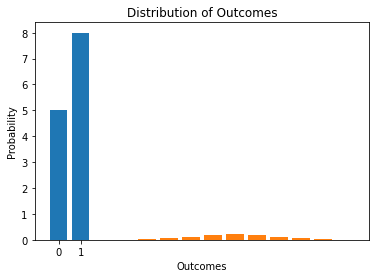

In [1]:
import daigle_dist
gaus = daigle_dist.Gaussian(25,2)
binom = daigle_dist.Binomial(0.4, 20)
print(gaus)
print(binom.p)
print(binom.n)
print()
binom.data = [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
print(binom.data)
binom.replace_stats_with_data()
print(binom.p)
print(binom.n)
display(binom.plot_bar())
print()
display(binom.plot_bar_pdf())

We can see above that it was successfully loaded to the the Test PyPi repo, installed, imported, and then used

**NEXT**, let's upload the final version to the main PyPi repo
If you already followed all of the steps to put the package on the test repo, you can skip to the point of just executing step **XXX**:

1. While in the folder holding the package files (i.e. `setup.py`), run `python setup.py sdist` from the terminal
> * This should create a directory `dist` with a a `filename-version.tar.gz`<br>
2. Ensure the `twine` package is installed (i.e. `pip install twine`)
3. To upload the package to the PyPi test repository, enter `twine upload dist/*`
4. Enter your pypi.org credentials
5. You may need to adjust the version or other items if the upload fails
6. You can now install the package with `pip install --index-url https://test.pypi.org/simple/ daigle-dist`

### More PyPi Resources
**Tutorial on distributing packages**
This link has a good tutorial on distributing Python packages including more configuration options for your `setup.py` file: [tutorial on distributing packages](https://packaging.python.org/tutorials/distributing-packages/). You'll notice that the python command to run the `setup.py` is slightly different with:
```shell
python3 setup.py sdist bdist_wheel
```
This command will still output a folder called `dist`. The difference is that you will get both a .tar.gz file and a .whl file. The .tar.gz file is called a *source archive* whereas the .whl file is a *built distribution*. The .whl file is a newer type of installation file for Python packages. When you pip install a package, pip will first look for a whl file (wheel file) and if there isn't one, will then look for the tar.gz file.

A tar.gz file, ie an sdist, contains the files needed to [compile](https://en.wikipedia.org/wiki/Compiler) and install a Python package. A whl file, i.e. *a built distribution*, only needs to be copied to the proper place for installation. Behind the scenes, pip installing a whl file has fewer steps than a tar.gz file.

Other than this command, the rest of the steps for uploading to PyPi are the same.

**Other Links**
If you'd like to learn more about PyPi, here are a couple of resources:
* [Overview of PyPi](https://docs.python.org/3/distutils/packageindex.html)
* [MIT License](https://opensource.org/licenses/MIT)

## Summary:
1. Classes VS Objects
2. Methods and Attributes
3. Magic Methods, Inheritance
4. Python Package
5. PyPi

### ASIDE:
**Reminders**
* include a README file detailing the files in your package and how to install the package.
* Comment your code - use docstrings and inline comments where appropriate.
* Refactor code when possible - if you find your functions are getting too long, then refactor your code!
* Use object-oriented programming whenever it makes sense to do so.
* You're encouraged to write unit tests! The coding exercises in this lesson contained unit tests, so you can use those tests as a model for your package.
* Use GitHub for version control, and commit your work often.

As a reminder, your package should be placed in a folder with the following folders and files:

* a folder with the name of your package that contains:
> * the Python code that makes up your package
> * a README.md file
> * an __init__.py
> * license.txt
> * setup.cfg
* setup.py file

**Hints and Helpful Links**
Because this exercise requires writing and organizing code in a specific way, you might have to rewatch some of the lecture videos especially the "Putting Code on PyPi" concept.

Before you upload your code to PyPi, you should first pip install the package locally to make sure everything works as expected. The "Making a Package" and "Virtual Environments" lesson concepts should be helpful. You should also consider writing unit tests to test the functionality of your package. In the object-oriented programming lesson workspace, there were unit tests inside the 4a_binomial_package folder that you can use to help you get started. Those were in a file called test.py.

The object-oriented programming lesson included a complete, working package called dsnd-probability. We encourage you to code a project from scratch; however, if you get stuck, use the dsnd-probability package code as a template. It already contains all of the necessary files you'll need for creating a package. It's also a simple example of object-oriented code. You can use these files, including the setup.py and setup.cfg files, to help structure your own code.

Those files are located in the "Exercise: Upload to PyPi" section inside the "5_exercise_upload_to_pypi" folder.

Besides the lesson on object-oriented programming, you might find [this package building summary guide from the Python website](https://packaging.python.org/guides/distributing-packages-using-setuptools/) helpful.

For a much more detailed explanation of distributing Python packages, check out the documentation on Distutils.

1. [Introduction](https://docs.python.org/3/distutils/introduction.html)
2. [setup.py script](https://docs.python.org/3/distutils/setupscript.html)
3. [config file](https://docs.python.org/3/distutils/configfile.html)
4. [source distributions](https://docs.python.org/3/distutils/sourcedist.html)
5. [built distributions](https://docs.python.org/3/distutils/builtdist.html)
6. [uploading to PyPi](https://docs.python.org/3/distutils/packageindex.html)

**Uploading to PyPi**
When you are ready to upload your package, you can first upload to the [PyPi test repository](https://test.pypi.org/). Once everything is working as expected, you can upload to the public facing [PyPi repository](https://pypi.org/).

As a reminder, you'll need to create a username for both the test and public facing repositories. You'll also need to pip install the twine package with: `pip install twine`. You can rewatch the lesson videos to see how to upload your package.

Continue on to the next sections to get some troubleshooting tips, and access the project workspace. When you're finished with your project, show off your work on a personal website, GitHub, and LinkedIn.

**Re-uploading and Versioning**
Once you upload your package to PyPi, you cannot upload the same version again. All that means is that you need to go into your setup.py file and change the version number. For example, if you uploaded a package with `version = 0.1.1`, then you'll need to change this to something else like `version = 0.1.2`.

If you've ever wondered what all these version numbers mean, here is a tutorial about [semantic versioning](https://semver.org/). Semantic versioning is a standard for deciding when to move up to the next number in your versioning scheme.